I compare the radio-to-optical offsets computed using Gaia DR2 and ICRF3 SX catalog and those using USNO survey (Zacharis &Zacharis 2013) and ICRF2 catalog. 

Since the authors provided two versions of data reduction, this note will include these two catalogs.

In [1]:
from astropy.table import Table, join
from matplotlib import pyplot as plt
import numpy as np

In [2]:
r2o = Table.read("../data/icrf3_sx_gaia_offset.fits")

r2o = r2o["iers_name", "ra_err_sx", "dec_err_sx", "pos_err_sx",
          "ra", "ra_err_g", "dec", "dec_err_g", "pos_err_g",
          "dra_sx", "ddec_sx", "dra_err_sx", "ddec_err_sx", "dra_ddec_cov_sx",
          "ang_sep_sx", "pa_sx", "nor_ra_sx", "nor_dec_sx", "nor_sep_sx",
          "dra_sx_ccl2", "ddec_sx_ccl2", "ang_sep_sx_ccl2", "pa_sx_ccl2",
          "nor_ra_sx_ccl2", "nor_dec_sx_ccl2", "nor_sep_sx_ccl2"]

# 1 Use UCAC2 as reference

In [3]:
# Use UCAC2 as the reference catalog
usno2 = Table.read("../data/Zacharis2014-icrf-u2.fits")
usno2.rename_column("Rname", "iers_name")
usno2 = usno2["iers_name", "Dist", "dRA*", "dDec", "eRA", "eDE",
              "sRA", "sDE", "eRad"]

# Cross-match
join_tab2 = join(r2o, usno2, keys="iers_name")

Offset between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: USNO2 - ICRF2


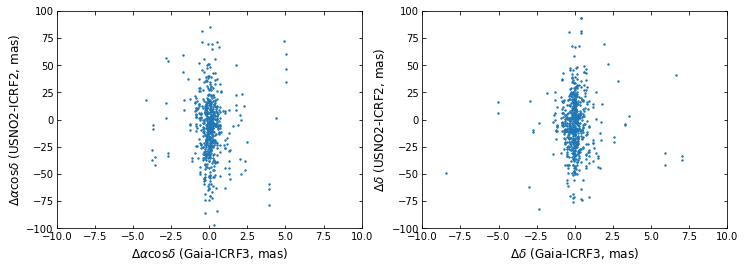

In [4]:
# Compare the position offset
print("Offset between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: USNO2 - ICRF2")

fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), ncols=2)

ax0.scatter(-join_tab2["dra_sx"], join_tab2["dRA*"], s=2)
ax1.scatter(-join_tab2["ddec_sx"], join_tab2["dDec"], s=2)

ax0.set_xlabel("$\Delta\\alpha\cos\delta$ (Gaia-ICRF3, mas)", fontsize=12)
ax0.set_ylabel("$\Delta\\alpha\cos\delta$ (USNO2-ICRF2, mas)", fontsize=12)

ax1.set_xlabel("$\Delta\delta$ (Gaia-ICRF3, mas)", fontsize=12)
ax1.set_ylabel("$\Delta\delta$ (USNO2-ICRF2, mas)", fontsize=12)

ax0.axis([-10, 10, -100, 100])
ax1.axis([-10, 10, -100, 100])

plt.subplots_adjust()

Angular separation between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: USNO2 - ICRF2


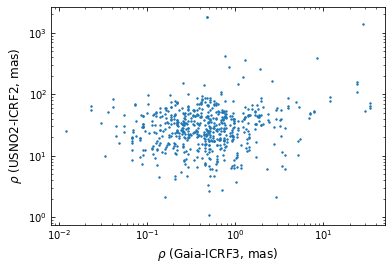

In [5]:
# Angular separation
fig, ax = plt.subplots()
ax.scatter(join_tab2["ang_sep_sx"], join_tab2["Dist"], s=2)
ax.set_xlabel("$\\rho$ (Gaia-ICRF3, mas)", fontsize=12)
ax.set_ylabel("$\\rho$ (USNO2-ICRF2, mas)", fontsize=12)

ax.set_xscale("log")
ax.set_yscale("log")

print("Angular separation between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: USNO2 - ICRF2")

Obviously, radio-to-optical offsets calculated from Rio survey and ICRF2 catalog is significantly greater than those from Gaia and ICRF3 catalog.

Offset between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: USNO2 - ICRF2


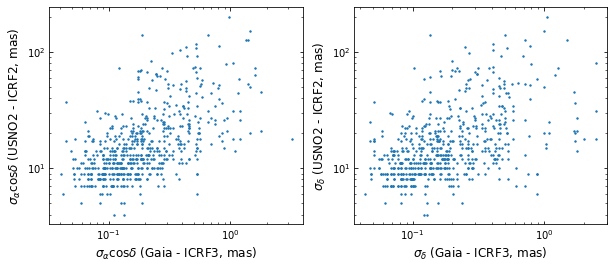

In [6]:
# Compare the position error
print("Offset between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: USNO2 - ICRF2")

fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2)

ax0.scatter(join_tab2["dra_err_sx"], join_tab2["eRA"], s=2)
ax1.scatter(join_tab2["ddec_err_sx"], join_tab2["eDE"], s=2)

ax0.set_xlabel("$\sigma_\\alpha\cos\delta$ (Gaia - ICRF3, mas)", fontsize=12)
ax0.set_ylabel("$\sigma_\\alpha\cos\delta$ (USNO2 - ICRF2, mas)", fontsize=12)

ax1.set_xlabel("$\sigma_\delta$ (Gaia - ICRF3, mas)", fontsize=12)
ax1.set_ylabel("$\sigma_\delta$ (USNO2 - ICRF2, mas)", fontsize=12)

ax0.set_xscale("log")
ax0.set_yscale("log")

ax1.set_xscale("log")
ax1.set_yscale("log")

plt.subplots_adjust()

The cause of this discrepancy is most likely due to systematic errors in the Rio position, which is similar to those reported by Mignard.

# 1 Use UCAC2 as reference

In [7]:
# Use UCAC4 catalog as the reference
usno4 = Table.read("../data/Zacharis2014-icrf-u4.fits")
usno4.rename_column("Rname", "iers_name")
usno4 = usno4["iers_name", "Dist", "dRA*", "dDec", "eRA", "eDE",
              "sRA", "sDE", "eRad"]

join_tab4 = join(r2o, usno4, keys="iers_name")

join_tab4

iers_name,ra_err_sx,dec_err_sx,pos_err_sx,ra,ra_err_g,dec,dec_err_g,pos_err_g,dra_sx,ddec_sx,dra_err_sx,ddec_err_sx,dra_ddec_cov_sx,ang_sep_sx,pa_sx,nor_ra_sx,nor_dec_sx,nor_sep_sx,dra_sx_ccl2,ddec_sx_ccl2,ang_sep_sx_ccl2,pa_sx_ccl2,nor_ra_sx_ccl2,nor_dec_sx_ccl2,nor_sep_sx_ccl2,Dist,dRA*,dDec,eRA,eDE,sRA,sDE,eRad
,mas,mas,mas,deg,mas,deg,mas,mas,mas,mas,mas,mas,,mas,deg,,,,mas,mas,,deg,,,,mas,mas,mas,mas,mas,,,mas
bytes8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0002-478,0.06624331361080132,0.10759999999999999,0.1092520311826254,1.1485644787260738,0.32535001967377664,-47.60544549244506,0.38175267275937685,0.4046925099699907,0.10483375797278259,-0.23259781301021573,0.3320253181609285,0.39662685632585176,-0.03068195001551304,0.25513106323580287,155.7385165198541,0.31574025304290493,-0.5864398976027061,0.6146810169726248,0.09847753654841823,-0.2816497650887939,0.2983695952660355,160.7280571243572,0.23650226345101594,-0.646060910252982,0.7228054286435159,27.4,-27.1,3.9,19,19,-1.4,0.2,0.2
0003-066,0.030558773168077865,0.0314,0.03153349547988754,1.5578870064695536,0.09430468606721869,-6.39314865050367,0.062095265856561006,0.09842497204589487,0.04870482785710256,-0.21658679010272405,0.09913229762178775,0.06958291486993766,0.0021294087057234195,0.22199549072805835,167.32646542951596,0.4913113992668923,-3.112643247377057,3.4669232521357687,0.08725909501372613,-0.2313864173570624,0.2472929918132561,159.33783022787878,0.40503550127265,-3.525521012086116,3.8828591017899647,51.8,-51.8,0.7,12,12,-4.3,0.1,0.0
0003-066,0.030558773168077865,0.0314,0.03153349547988754,1.5578870064695536,0.09430468606721869,-6.39314865050367,0.062095265856561006,0.09842497204589487,0.04870482785710256,-0.21658679010272405,0.09913229762178775,0.06958291486993766,0.0021294087057234195,0.22199549072805835,167.32646542951596,0.4913113992668923,-3.112643247377057,3.4669232521357687,0.08725909501372613,-0.2313864173570624,0.2472929918132561,159.33783022787878,0.40503550127265,-3.525521012086116,3.8828591017899647,37.5,-12.6,-35.3,29,29,-0.4,-1.2,0.0
0007+106,0.03607787203439982,0.0385,0.039351348789675895,2.6291913864114305,0.07220077482853457,10.974862370062839,0.06707566002756404,0.0875928007083494,-0.4212826858664831,-0.23412622240925882,0.08071285360072013,0.07733947354445433,0.002665818833408445,0.4819690751806672,240.937052716043,-5.219524116326428,-3.0272538935073596,5.293647252558684,-0.3857272425524527,-0.24472179764532712,0.45680878263216346,237.60721757189287,-5.21390328367681,-3.436597387489477,4.937841544925132,85.2,-85.2,-0.1,12,12,-7.1,0.0,0.1
0008-264,0.03431739949162355,0.036,0.03826341478939687,2.7551948192602023,0.26474200864756736,-26.209271412091674,0.19152239774407323,0.2648242736959451,-0.26057603293141807,-0.050469976997646875,0.26695695355359506,0.19487644505593532,0.000987770493148936,0.2654187022732544,259.0383275511127,-0.9760975672772804,-0.25898449134353047,1.0052881031865653,-0.235193209774297,-0.08040876209722658,0.2485586750567054,251.12526983010844,-1.0437797970869136,-0.396478103096095,0.9659041017993609,34.0,-14.0,-31.0,62,62,-0.2,-0.5,0.1
0013-005,0.044699562638714926,0.05879999999999999,0.059214143132657604,4.04620223886711,0.5199497615091785,-0.2534567177719667,0.40458852429884573,0.5693752180307423,0.19667647719617645,-1.2285209197937517,0.5218676128996166,0.40883898296801113,0.09268644377722544,1.2441644935671423,170.90457869110182,0.3768704405766755,-3.00490161401726,3.538028853668766,0.23546724015974685,-1.2422502502565116,1.264369607927529,169.26697737185413,0.3660372532606092,-3.0803897302896712,3.6192670544139793,16.0,9.7,12.7,44,44,0.2,0.3,0.1
0013-005,0.044699562638714926,0.05879999999999999,0.059214143132657604,4.04620223886711,0.5199497615091785,-0.2534567177719667,0.40458852429884573,0.5693752180307

Offset between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: USNO4 - ICRF2


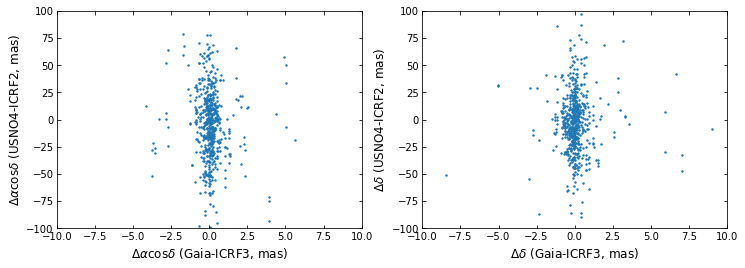

In [8]:
# Compare the position offset
print("Offset between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: USNO4 - ICRF2")

fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), ncols=2)

ax0.scatter(-join_tab4["dra_sx"], join_tab4["dRA*"], s=2)
ax1.scatter(-join_tab4["ddec_sx"], join_tab4["dDec"], s=2)

ax0.set_xlabel("$\Delta\\alpha\cos\delta$ (Gaia-ICRF3, mas)", fontsize=12)
ax0.set_ylabel("$\Delta\\alpha\cos\delta$ (USNO4-ICRF2, mas)", fontsize=12)

ax1.set_xlabel("$\Delta\delta$ (Gaia-ICRF3, mas)", fontsize=12)
ax1.set_ylabel("$\Delta\delta$ (USNO4-ICRF2, mas)", fontsize=12)

ax0.axis([-10, 10, -100, 100])
ax1.axis([-10, 10, -100, 100])

plt.subplots_adjust()

Angular separation between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: USNO4 - ICRF2


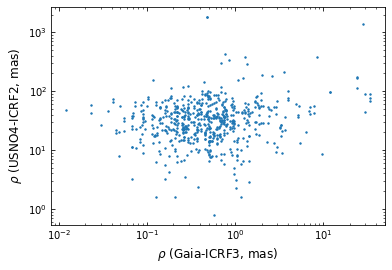

In [9]:
# Angular separation
fig, ax = plt.subplots()
ax.scatter(join_tab4["ang_sep_sx"], join_tab4["Dist"], s=2)
ax.set_xlabel("$\\rho$ (Gaia-ICRF3, mas)", fontsize=12)
ax.set_ylabel("$\\rho$ (USNO4-ICRF2, mas)", fontsize=12)

ax.set_xscale("log")
ax.set_yscale("log")

print("Angular separation between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: USNO4 - ICRF2")

Obviously, radio-to-optical offsets calculated from Rio survey and ICRF2 catalog is significantly greater than those from Gaia and ICRF3 catalog.

Offset between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: USNO4 - ICRF2


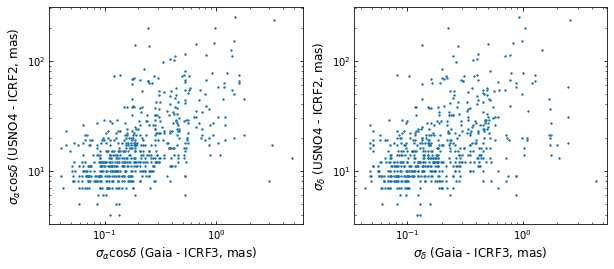

In [10]:
# Compare the position error
print("Offset between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: USNO4 - ICRF2")

fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2)

ax0.scatter(join_tab4["dra_err_sx"], join_tab4["eRA"], s=2)
ax1.scatter(join_tab4["ddec_err_sx"], join_tab4["eDE"], s=2)

ax0.set_xlabel("$\sigma_\\alpha\cos\delta$ (Gaia - ICRF3, mas)", fontsize=12)
ax0.set_ylabel("$\sigma_\\alpha\cos\delta$ (USNO4 - ICRF2, mas)", fontsize=12)

ax1.set_xlabel("$\sigma_\delta$ (Gaia - ICRF3, mas)", fontsize=12)
ax1.set_ylabel("$\sigma_\delta$ (USNO4 - ICRF2, mas)", fontsize=12)

ax0.set_xscale("log")
ax0.set_yscale("log")

ax1.set_xscale("log")
ax1.set_yscale("log")

plt.subplots_adjust()